In [2]:
%matplotlib inline
import datetime as dt
import sqlite3
import pandas.io.sql as psql
import pandas as pd
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
from ipywidgets import interact

In [5]:
conn = sqlite3.connect("../brand.sqlite3")
c = conn.cursor()

In [6]:
brand_list = psql.read_sql('select * from brand_list',conn)

In [7]:
brand_list

,ccode,market,name
0,1301,東証1部,(株)極洋
1,1332,東証1部,日本水産(株)
2,1333,東証1部,マルハニチロ(株)
3,1352,東証1部,(株)ホウスイ
4,1376,東証1部,カネコ種苗(株)
5,1377,東証1部,(株)サカタのタネ
6,1379,東証1部,ホクト(株)
7,1380,東証JQS,(株)秋川牧園
8,1381,東証JQS,(株)アクシーズ
9,1382,東証JQS,(株)ホーブ


In [11]:
#indexをdatetime化
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

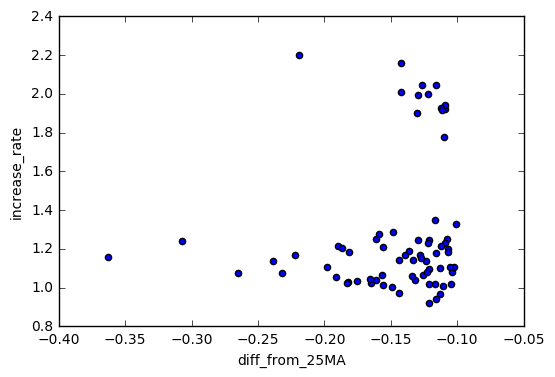

In [49]:
#乖離率と値上げの相関
columns = ['max_close','diff_from_25MA', 'increase_rate']
correlation = pd.DataFrame(columns = columns, )

#tmpdata={'max_close':[], 'diff_from_25MA':[], 'increase_rate':[]}
for date in data.index:
#    #print(date)
    max_close = data['close'][date + offsets.Day(1):date + offsets.Day(30)].max()
    diff_from_25MA = data['Diff_from_25MA'][date]
    buy = data.ix[date:][1:2]['open']
    if buy.size > 0:
        buy = buy.values[0]
        increase_rate = max_close/buy
    
        correlation = correlation.append(pd.DataFrame([[max_close,diff_from_25MA,increase_rate]], columns=columns))

ax = correlation[correlation['diff_from_25MA'] < -0.1].plot.scatter(x = 'diff_from_25MA', y = 'increase_rate')
fig = ax.get_figure()
fig.savefig('./figure/3912.png')

In [43]:
def correlation_plot(days = 30):
    #乖離率と値上げの相関
    columns = ['max_close','diff_from_25MA', 'increase_rate']
    correlation = pd.DataFrame(columns = columns, )
        
    #tmpdata={'max_close':[], 'diff_from_25MA':[], 'increase_rate':[]}
    for date in data.index:
    #    #print(date)
        max_close = data['close'][date + offsets.Day(1):date + offsets.Day(days)].max()
        diff_from_25MA = data['Diff_from_25MA'][date]
        close = data.ix[date,'close']
        increase_rate = max_close/close
    
        correlation = correlation.append(pd.DataFrame([[max_close,diff_from_25MA,increase_rate]], columns=columns))
    correlation.plot.scatter(x = 'diff_from_25MA', y = 'increase_rate')

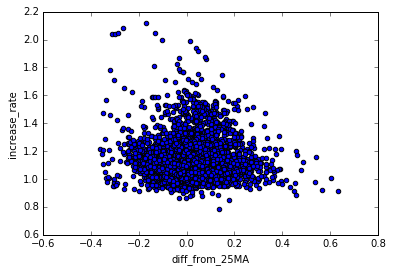

In [152]:
interact(correlation_plot, days=(1,60,1))

NameError: name 'data' is not defined

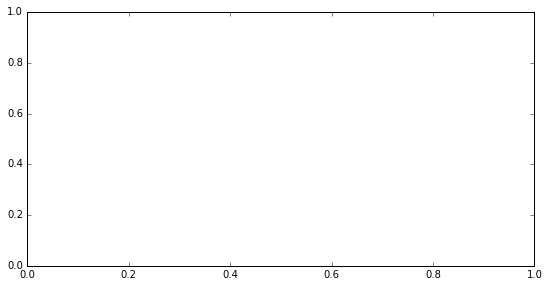

In [6]:
#plot
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
data.set_index('date')['Diff_from_25MA'].plot()
data.set_index('date')['Diff_from_50MA'].plot()
data.set_index('date')['Diff_from_75MA'].plot()
plt.subplot(2,2,3)
data.set_index('date')['25MA'].plot()
data.set_index('date')['50MA'].plot()
data.set_index('date')['75MA'].plot()

In [25]:
brand_list[brand_list['ccode']==1438]["market"].values[0] == '\xa0'

True

In [ ]:
corr_columns = ['code','correlation']
result = pd.DataFrame(columns = corr_columns,)

for code in brand_list['ccode']:
    if brand_list[brand_list['ccode'] == code]["market"].values[0] == '\xa0':
        continue
    db = DB(code)
    data = db.read()
    
    #indexをdatetime化
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    
    #乖離率と値上げの相関
    columns = ['max_close','diff_from_25MA', 'increase_rate']
    correlation = pd.DataFrame(columns = columns, )

    #tmpdata={'max_close':[], 'diff_from_25MA':[], 'increase_rate':[]}
    for date in data.index:
    #    #print(date)
        max_close = data['close'][date + offsets.Day(1):date + offsets.Day(30)].max()
        diff_from_25MA = data['Diff_from_25MA'][date]
        buy = data.ix[date:][1:2]['open']
        if buy.size > 0:
            buy = buy.values[0]
            increase_rate = max_close/buy
        
            correlation = correlation.append(pd.DataFrame([[max_close,diff_from_25MA,increase_rate]], columns=columns))
    
    ax = correlation[correlation['diff_from_25MA'] < -0.1].plot.scatter(x = 'diff_from_25MA', y = 'increase_rate')
    fig = ax.get_figure()
    fig.savefig('./figure/{}_10%.png'.format(code))
    
    ax = correlation.plot.scatter(x = 'diff_from_25MA', y = 'increase_rate')
    fig = ax.get_figure()
    fig.savefig('./figure/{}.png'.format(code))
    
    #print(correlation[correlation['diff_from_25MA'] < -0.1][['diff_from_25MA','increase_rate']].corr().ix[0,1])
    corr = correlation[correlation['diff_from_25MA'] < -0.1][['diff_from_25MA','increase_rate']].corr().ix[0,1]
    result = result.append(pd.DataFrame([[code,corr]],columns = corr_columns))

code_1301: The table found


In [7]:
result

,code,correlation
0,1332.0,-0.319892
